In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/DataSet/market-price.csv", names=['day','price']) #비트코인차트데이터

In [ ]:
df.head()

,day,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000


In [ ]:
df['day'] = pd.to_datetime(df['day']) #시계열 피쳐단위로 바꿔줌
df.head()

,day,price
0,2017-08-27,4354.308333
1,2017-08-28,4391.673517
2,2017-08-29,4607.985450
3,2017-08-30,4594.987850
4,2017-08-31,4748.255000


In [ ]:
df_date = df.set_index('day')
df_date.head()

,price
day,
2017-08-27,4354.308333
2017-08-28,4391.673517
2017-08-29,4607.985450
2017-08-30,4594.987850
2017-08-31,4748.255000


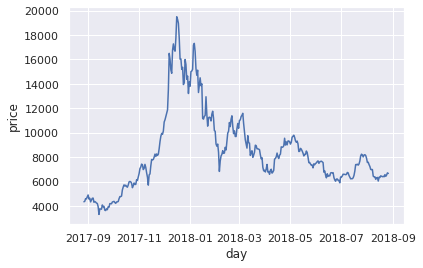

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.lineplot(data=df_date, x="day", y="price")

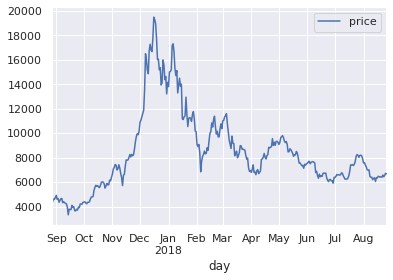

In [ ]:
df_date.plot()
# 안정적 시계열이 아니네...

ARIMA(Autoregressvie integrated MovingAverage) : 현실에 존재하는 시계열자료는 불안정한 경우 많음. 이런한 비정상성을 제거하는 과정을 포함한것 ARIMA(p, d, q)

AR(Autoregressive 자기상관) : 이전의 값이 이후의 값에 영향을 미치고 있는 상황

I(Intgrated 누적) : 차분을 이용하는 시계열 모형들에 붙이는 표현.

MA(Moving Average 이동평균) : 랜덤 변수의 평균값이 지속적으로 증가하거나 감소하는 추세 관측값이 이전의 연속적인 오차항의 영향을 받는다는 모형.

(차분은 비정상성을 정상성으로 만들기 위해, 관측값들의 차이를 계산하는 것.)

AR(p) = ARIMA(p, 0, 0)

MA(q) = ARIMA(0, 0, q)

ARMA(p, q) = ARIMA(p, 0, q)

p + q < 2

p * q = 0

ACF(Autocorrelation function) : Lag에 따른 관측치들 사이의 관련성을 측정하는 함수

PACF(Partial autocoreelation function) : k 이외의 모든 다른 시점 관측치의 영향력을 배제하고 두 관측치의 관련성을 측정하는 함수 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


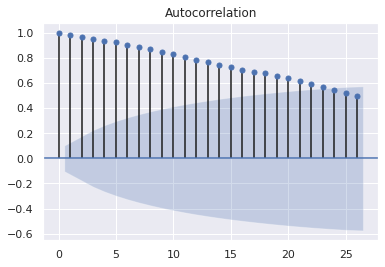

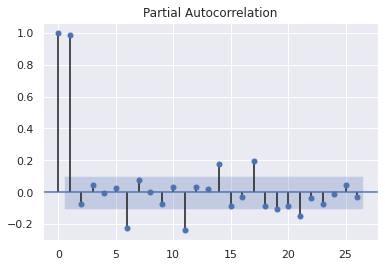

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_date)
plot_pacf(df_date)
plt.show()

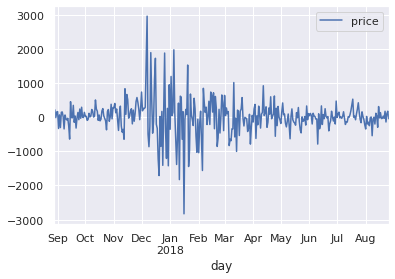

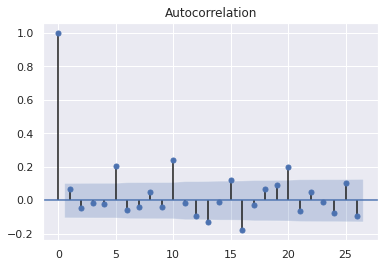

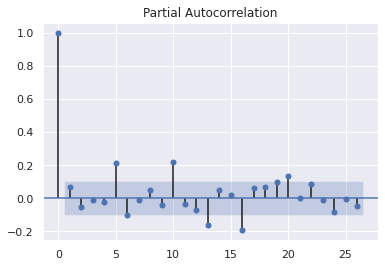

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1 = df_date.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터 ARIMA 모델을 학습
model = ARIMA(df_date.price.values, order=(2,1,2))

# trend : constant를 가지고 있는지, c - constant / nc - no constant
# disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_ouput=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2780.074
Method:                       css-mle   S.D. of innovations            501.536
Date:                Wed, 02 Dec 2020   AIC                           5572.148
Time:                        07:15:34   BIC                           5595.531
Sample:                             1   HQIC                          5581.442
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3906     26.944      0.237      0.813     -46.419      59.200
ar.L1.D.y      0.4496      0.029     15.512      0.000       0.393       0.506
ar.L2.D.y     -0.9622      0.023    -42.314      0.0

In [ ]:
forcast_data = model_fit.forecast(steps=5) # 학습 데이터셋으로 부터 5일 뒤를 예측

Auto Arima

In [4]:
! pip install pmdarima

In [5]:
import os
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

import seaborn as sns

plt.style.use('seaborn-whitegrid')
%matplotlib inline
import itertools

ImportError: ignored

In [6]:
data = pd.read_csv('/content/drive/MyDrive/DataSet/AirPassengers.csv')
data = data.rename(columns={'Month':'month', '#Passengers':'passengers'})
data['month'] = pd.to_datetime(data['month'])
data = data.set_index('month')
data

FileNotFoundError: ignored

Box-Jenkins ARIMA Procedure
1. Data Preprocessing
2. Identify Model to be Tentatively Entertainted
3. Estimate Prameters
4. Diagnosis Check
5. use Model to Forecast

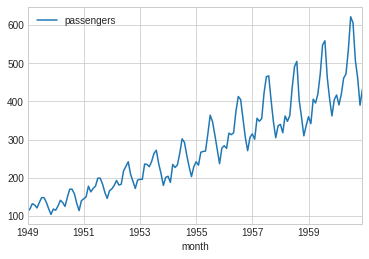

In [ ]:
fig = data.plot()
# 시간이 지날수록 증가하는 트렌드

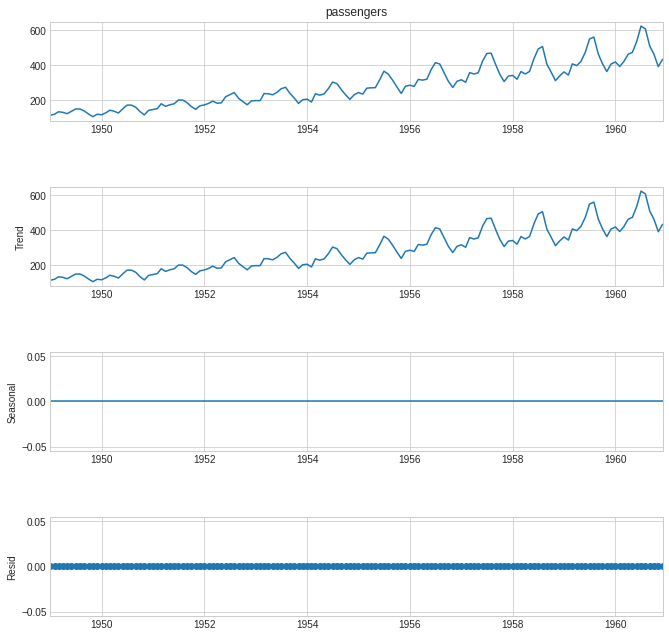

In [ ]:
docompostion = seasonal_decompose(data['passengers'], model='additive', period=1)
fig = docompostion.plot()
fig.set_size_inches(10,10)
plt.show()

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

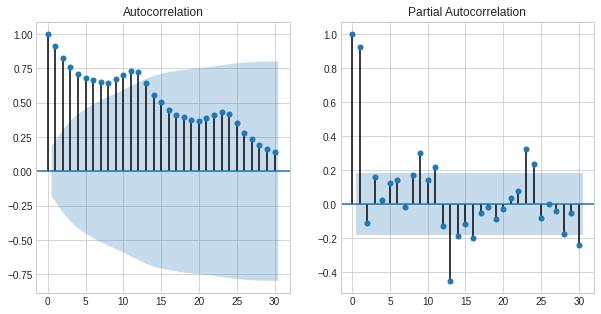

In [ ]:
flg, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle("Raw Data")
plot_acf(train_data.values.squeeze(), lags=30, ax=ax[0])
plot_pacf(train_data.values.squeeze(), lags=30, ax=ax[1]);
# 파도모양 : 트랜드가 있다. 
# 비정성적이다. 

In [ ]:
# Ditterencing

diff_train_data = train_data.copy()
diff_train_data = diff_train_data['passengers'].diff() # 1이 기본값
diff_train_data = diff_train_data.dropna() # 차분후 제일 마직막에 남는 값은 null이 될 것이므로 제거해줌
print('########### Raw Data #######')
print(train_data)
print('####### Differenced Data ####')
print(diff_train_data)

########### Raw Data #######
            passengers
month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1958-03-01         362
1958-04-01         348
1958-05-01         363
1958-06-01         435
1958-07-01         491

[115 rows x 1 columns]
####### Differenced Data ####
month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1958-03-01    44.0
1958-04-01   -14.0
1958-05-01    15.0
1958-06-01    72.0
1958-07-01    56.0
Name: passengers, Length: 114, dtype: float64


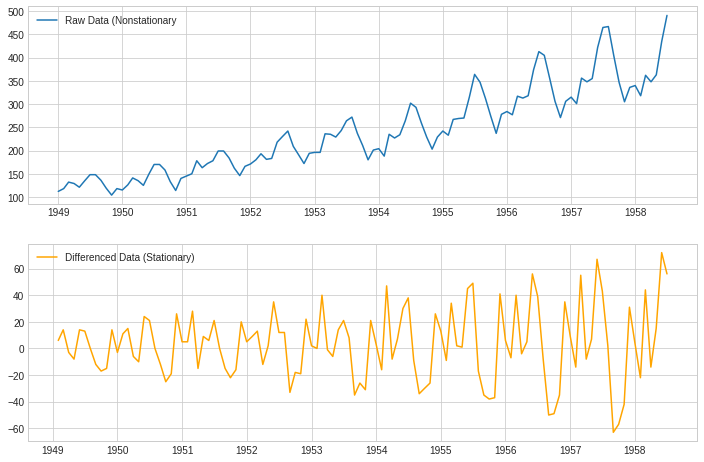

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(train_data['passengers'])
plt.legend(['Raw Data (Nonstationary'])
plt.subplot(212)
plt.plot(diff_train_data, 'orange')
plt.legend(['Differenced Data (Stationary)'])
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


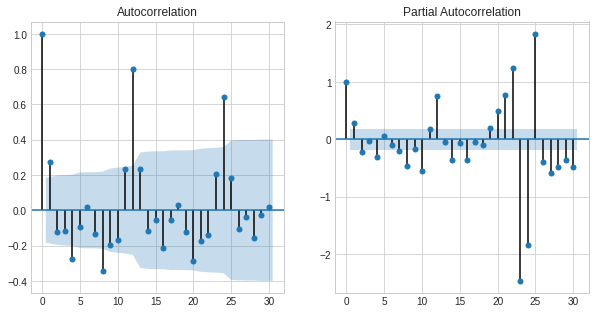

In [ ]:
flg, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle("Dfferenced Data")
plot_acf(diff_train_data.values.squeeze(), lags=30, ax=ax[0])
plot_pacf(diff_train_data.values.squeeze(), lags=30, ax=ax[1]);

In [ ]:
# ARIMA 모델이 p는 1, 차분은 1로 식별
model = ARIMA(train_data.values, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  114
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -531.720
Method:                       css-mle   S.D. of innovations             25.659
Date:                Thu, 03 Dec 2020   AIC                           1069.440
Time:                        07:22:07   BIC                           1077.649
Sample:                             1   HQIC                          1072.771
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5123      3.329      1.055      0.291      -3.012      10.036
ar.L1.D.y      0.2803      0.091      3.077      0.002       0.102       0.459
                                    Roots           

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
# Auto Arima

auto_arima_model = auto_arima(train_data, start_p=1, start_q=1,
                              max_p=3, max_q=3, m=12, seasonal=True,
                              d=1, D=1,
                              max_P=3, max_Q=3,
                              trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=757.826, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=756.988, Time=0.14 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=758.826, Time=0.61 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=758.186, Time=0.86 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=756.959, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=758.922, Time=0.23 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=1.55 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=754.685, Time=2.76 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=758.869, Time=0.22 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=760.726, Time=0.94 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=2.47 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=756.686, Time=3.35 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=759.643, Time=0.63 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=4.49 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=756.688, Time=4.78 sec
 ARIMA(0,1,1)(0,1,0)[1

In [ ]:
print(auto_arima_model.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                          y   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(1, 1, [1, 2, 3], 12)   Log Likelihood                -370.278
Date:                                    Thu, 03 Dec 2020   AIC                            752.557
Time:                                            07:27:20   BIC                            768.307
Sample:                                                 0   HQIC                           758.934
                                                    - 115                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2218      0.093     -2.388      0

In [ ]:
prediction = auto_arima_model.predict(len(test_data), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index = list(test_data.index)
predict_index[0]
#r2 = r2_score(test_data, predicted_value)

Timestamp('1958-08-01 00:00:00')

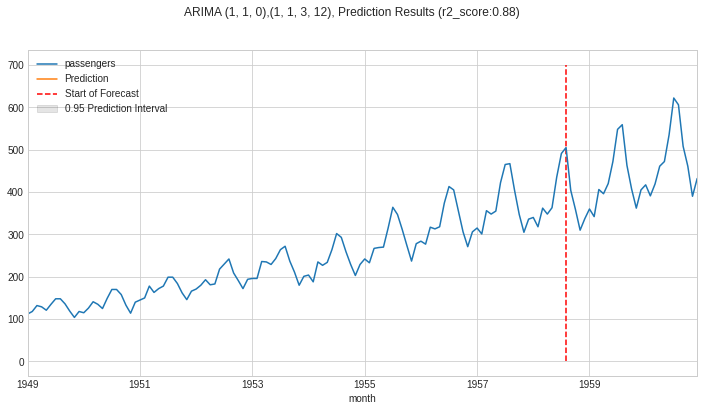

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(data, label='passengers')
plt.vlines('1958-08-01', 0, 700, linestyle='--', color='r', label='Start of Forecast')
plt.plot(predict_index[0], predicted_value, label='Prediction')
plt.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label='0.95 Prediction Interval')
plt.legend(loc='upper left')
plt.suptitle(f'ARIMA {auto_arima_model.order},{auto_arima_model.seasonal_order}, Prediction Results (r2_score:{round(r2,2)})')
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


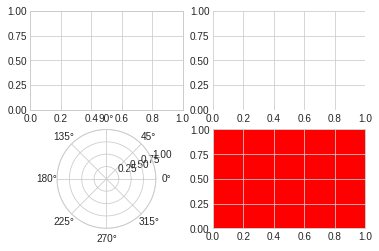

In [ ]:
plt.subplot(221)

# equivalent but more general
ax1=plt.subplot(2, 2, 1)

# add a subplot with no frame
ax2=plt.subplot(222, frameon=False)

# add a polar subplot
plt.subplot(223, projection='polar')

# add a red subplot that shares the x-axis with ax1
plt.subplot(224, sharex=ax1, facecolor='red')

# delete ax2 from the figure
plt.delaxes(ax2)

# add ax2 to the figure again
plt.subplot(ax2)

Case Stury : 주가예측
상정 법인 목록에서 종목코드를 통해 기업 주가 다운로드
최근 5년간 주식 관련 정보에 대한 시계열 데이터
데이터구조 : 1219x6

In [ ]:
import pandas as pd
import pandas_datareader.data as pdr

In [ ]:
stock_code = '005930'

In [ ]:
stock_code = stock_code + '.KS'
stock_data = pdr.get_data_yahoo(stock_code)
stock_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-07,25500.0,25240.0,25380.0,25240.0,9805350.0,254.735657
2015-12-08,25440.0,25240.0,25240.0,25240.0,6916100.0,254.735657
2015-12-09,25500.0,25240.0,25240.0,25260.0,9090600.0,254.937500
2015-12-10,25860.0,25260.0,25260.0,25660.0,15193350.0,258.974518
2015-12-11,25900.0,25440.0,25660.0,25680.0,10336450.0,259.176392
...,...,...,...,...,...,...
2020-11-30,68600.0,66700.0,68400.0,66700.0,43811016.0,66700.000000
2020-12-01,68300.0,67100.0,67100.0,67800.0,22327173.0,67800.000000
2020-12-02,69900.0,68300.0,68400.0,69500.0,29703942.0,69500.000000


In [ ]:
stock_data = stock_data[['Close']]
stock_data.head()

,Close
Date,
2015-12-07,25240.0
2015-12-08,25240.0
2015-12-09,25260.0
2015-12-10,25660.0
2015-12-11,25680.0


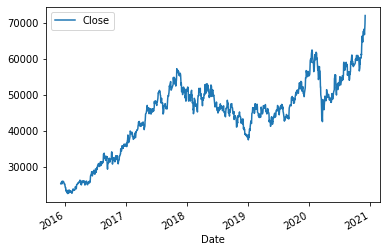

In [ ]:
fig = stock_data.plot()

In [ ]:
from sklearn.model_selection import train_test_split
stock_data_train, stock_data_test = train_test_split(stock_data, test_size=0.05, shuffle=False)

In [ ]:
stock_data_train.values.squeeze()

array([[2.55000000e+04, 2.52400000e+04, 2.53800000e+04, 2.52400000e+04,
        9.80535000e+06, 2.54735657e+02],
       [2.54400000e+04, 2.52400000e+04, 2.52400000e+04, 2.52400000e+04,
        6.91610000e+06, 2.54735657e+02],
       [2.55000000e+04, 2.52400000e+04, 2.52400000e+04, 2.52600000e+04,
        9.09060000e+06, 2.54937500e+02],
       ...,
       [5.51000000e+04, 5.41000000e+04, 5.46000000e+04, 5.44000000e+04,
        1.69057230e+07, 5.44000000e+04],
       [5.67000000e+04, 5.55000000e+04, 5.56000000e+04, 5.64000000e+04,
        2.83849200e+07, 5.64000000e+04],
       [5.58000000e+04, 5.51000000e+04, 5.52000000e+04, 5.56000000e+04,
        2.21391090e+07, 5.56000000e+04]])

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

ValueError: ignored

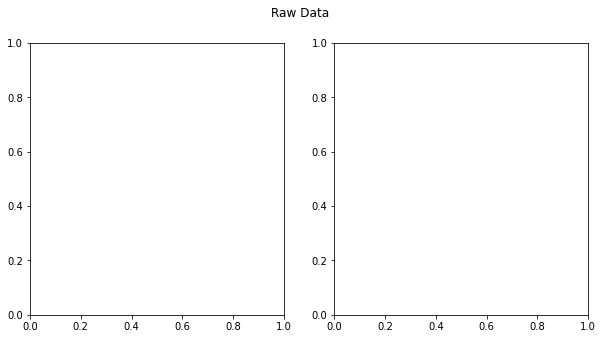

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Raw Data')
plot_acf(stock_data_train.values.squeeze(), lags=40, ax=ax[0])
plot_pacf(stock_data_train.values.squeeze(), lags=40, ax=ax[1])